# 전기차 관련 뉴스 말뭉치를 통한 Word2Vec model 활용
* '전기차' 뉴스 말뭉치를 통한 벡터 확인
* '전기차' 와 유사한 단어 파악

## 라이브러리 불러오기

In [1]:
# 연산 및 시각화 라이브러리
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline

# konlpy 및 정규표현식 라이브러리
from konlpy.tag import Kkma
import re

# 폰트 및 마이너스, 시각화 스타일 지정
plt.rc('font', family = 'AppleGothic')
plt.rc('axes', unicode_minus = False)
%config InlineBackend.figure_format = 'retina'
fontname = 'AppleGothic'

# seaborn의 set 함수 사용할 경우 지정
sns.set(style='whitegrid', font = fontname)

## 전기차 관련 뉴스 Dataframe 불러오기
* 키워드 '전기차' 로 네이버 검색-뉴스 api 를 통해 관련 뉴스 정보가 저장된 csv 를 불러옴

In [2]:
electric_car_news = pd.read_csv('data/news_electrcicar.csv')
electric_car_news.head()

,title,originallink,link,description,pubDate
0,"SK㈜, 이번엔 전기차 시장 공략…충전기 제조사 시그넷EV 인수(종합)",http://yna.kr/AKR20210415167800003?did=1195m,https://news.naver.com/main/read.nhn?mode=LSD&...,신주 포함 2천930억원으로 지분 55.5% 확보 스웨덴 전기차 폴스타에도 6천만달...,"Thu, 15 Apr 2021 18:04:00 +0900"
1,"SK, 전기차·급속 충전 시장 진출",http://www.etnews.com/20210415000266,https://news.naver.com/main/read.nhn?mode=LSD&...,SK㈜가 친환경 전기차 인프라 및 전기차 업체 투자로 세계 전기차 시장 공략에 나섰...,"Thu, 15 Apr 2021 18:23:00 +0900"
2,"SK, 전기차 시장 공략…시그넷 EV 인수·스웨덴 폴스타 투자",https://biz.chosun.com/site/data/html_dir/2021...,https://news.naver.com/main/read.nhn?mode=LSD&...,SK(034730)그룹의 투자전문회사 SK㈜가 국내 초급속 충전기 제조사인 시그넷 ...,"Thu, 15 Apr 2021 18:14:00 +0900"
3,제네시스·전기차·수소차 다 동원…中 시장 재건 나선 현대차그룹,http://news.mt.co.kr/mtview.php?no=20210415142...,https://news.naver.com/main/read.nhn?mode=LSD&...,현대차그룹이 전용 전기차를 비롯한 친환경차 라인업 확대 등 중국시장 재도약을 위한 ...,"Thu, 15 Apr 2021 15:00:00 +0900"
4,"SK, 전기차 충전기 제조사 '시그넷 EV' 인수… 스웨덴 전기차 '폴스타' 투자도",http://moneys.mt.co.kr/news/mwView.php?no=2021...,https://news.naver.com/main/read.nhn?mode=LSD&...,투자전문회사 SK가 친환경 전기차 인프라 및 기술 선점을 통해 글로벌 전기차 시장 ...,"Thu, 15 Apr 2021 18:14:00 +0900"


null 값 확인 후 null 값 삭제

In [3]:
electric_car_news.isnull().sum()

title           0
originallink    0
link            0
description     1
pubDate         0
dtype: int64

In [4]:
electric_car = electric_car_news.dropna()

null 삭제 후 기사 수 확인

In [5]:
electric_car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         999 non-null    object
 1   originallink  999 non-null    object
 2   link          999 non-null    object
 3   description   999 non-null    object
 4   pubDate       999 non-null    object
dtypes: object(5)
memory usage: 46.8+ KB


## 말뭉치 생성

In [6]:
# kkma 객체 생성
kkma = Kkma()

In [7]:
description = electric_car['description'].tolist()
print(type(description))
description[0:5]

<class 'list'>


['신주 포함 2천930억원으로 지분 55.5% 확보 스웨덴 전기차 폴스타에도 6천만달러 투자 SK그룹의 투자전문 지주회사 SK㈜가 글로벌 전기차 시장 공략에 나선다. SK㈜는 초급속 충전기 제조회사인 한국 시그넷 EV를 인수해... ',
 'SK㈜가 친환경 전기차 인프라 및 전기차 업체 투자로 세계 전기차 시장 공략에 나섰다. SK㈜는 초급속 전기차 충전기 제조사인 시그넷이브이를 인수하고 유럽 전기차 제조사인 폴스타에 투자한다고 15일 밝혔다. SK... ',
 'SK(034730)그룹의 투자전문회사 SK㈜가 국내 초급속 충전기 제조사인 시그넷 EV를 약 2900억원에 인수하고 스웨덴 전기차 제조사 폴스타(Polestar)에 약 670억원 투자해 글로벌 전기차 시장 공략에 속도를 낸다. SK㈜는... ',
 '현대차그룹이 전용 전기차를 비롯한 친환경차 라인업 확대 등 중국시장 재도약을 위한 사업 전략을... 전기차를 비롯한 전동화 라인업도 대폭 확대한다. 우선 빠르면 올해 출시 예정인 전용 전기차 아이오닉5, EV6를... ',
 '투자전문회사 SK가 친환경 전기차 인프라 및 기술 선점을 통해 글로벌 전기차 시장 공략을 본격화한다. SK는 글로벌 선도 초급속 충전기 제조회사인 한국 시그넷 EV를 인수해 전기차 충전 시장에 본격 진출하는 한편... ']

In [8]:
# kkma.nouns 로 각 기사별 명사만 추출하여 2차원 리스트로 저장
doc = [kkma.nouns(sent) for sent in description]

In [9]:
print(doc[0:5])

[['신주', '포함', '2', '2천930억', '천', '930', '억', '원', '지분', '55.5', '확보', '스웨덴', '전', '전기차', '기차', '폴', '폴스타', '스타', '6', '6천만달러', '천만', '달러', '투자', '그룹', '투자전문', '전문', '지주', '지주회사', '회사', '글로벌', '시장', '공략', '초급', '초급속', '속', '충전기', '제조', '제조회사', '한국', '시', '그', '넷', '인수'], ['환경', '전', '전기차', '기차', '인프라', '업체', '투자', '세계', '시장', '공략', '초급', '초급속', '속', '충전기', '제조사', '시', '넷', '넷이브', '이브', '인수', '유럽', '폴', '폴스타', '스타', '15', '15일', '일'], ['034730', '그룹', '투자', '투자전문회사', '전문', '회사', '국내', '초급', '초급속', '속', '충전기', '제조사', '시', '그', '넷', '약', '2900', '2900억원', '억', '원', '인수', '스웨덴', '전', '전기차', '기차', '폴', '폴스타', '스타', '670', '670억원', '글로벌', '시장', '공략', '속도'], ['현대', '현대차그룹', '차', '그룹', '전용', '전', '전기차', '기차', '친', '친환경차', '환경', '라인업', '확대', '등', '중국', '중국시장', '시장', '도약', '사업', '전략', '전동', '올해', '출시', '예정', '아이오', '아이오닉5', '닉', '5', '6'], ['투자', '투자전문회사', '전문', '회사', '환경', '전', '전기차', '기차', '인프라', '기술', '선점', '글로벌', '시장', '공략', '본격화', '선도', '초급', '초급속', '속', '충전기', '제조', '제조회사', '한국', '시', '그',

2글자 미만, 숫자 삭제

In [10]:
# 2글자 미만 삭제
docs = [[word for word in sent if not len(word) == 1] for sent in doc]

# 숫자 삭제 ex) '2.2억' , '2', '5.5억달러'
docs = [[word for word in sent if not any(chr.isdigit() for chr in word) ] for sent in docs]

In [11]:
print(docs[0:5])

[['신주', '포함', '지분', '확보', '스웨덴', '전기차', '기차', '폴스타', '스타', '천만', '달러', '투자', '그룹', '투자전문', '전문', '지주', '지주회사', '회사', '글로벌', '시장', '공략', '초급', '초급속', '충전기', '제조', '제조회사', '한국', '인수'], ['환경', '전기차', '기차', '인프라', '업체', '투자', '세계', '시장', '공략', '초급', '초급속', '충전기', '제조사', '넷이브', '이브', '인수', '유럽', '폴스타', '스타'], ['그룹', '투자', '투자전문회사', '전문', '회사', '국내', '초급', '초급속', '충전기', '제조사', '인수', '스웨덴', '전기차', '기차', '폴스타', '스타', '글로벌', '시장', '공략', '속도'], ['현대', '현대차그룹', '그룹', '전용', '전기차', '기차', '친환경차', '환경', '라인업', '확대', '중국', '중국시장', '시장', '도약', '사업', '전략', '전동', '올해', '출시', '예정', '아이오'], ['투자', '투자전문회사', '전문', '회사', '환경', '전기차', '기차', '인프라', '기술', '선점', '글로벌', '시장', '공략', '본격화', '선도', '초급', '초급속', '충전기', '제조', '제조회사', '한국', '인수', '전기', '충전', '본격', '진출', '한편']]


## Word2Vec 모델 생성
Word2Vec 의 주요 하이퍼파라미터 
* sentence : Word2Vec 모델 학습에 필요한 문장 데이터, Word2Vec 모델의 입력값
* size : 단어 임베딩 벡터의 차원(크기)
* window : 주변 단어 윈도우 크기
* hs : 0이 아닌 경우 음수 샘플링 사용, 1일 경우 모델에 softmax 사용
* min_count : 단어 최소 빈도 수 제한(설정된 빈도수 이하의 단어들은 학습하지 않음)
* sg = 0(CBOW), 1(skip-gram)

In [12]:
from gensim.models.word2vec import Word2Vec

In [13]:
# Word2Vec model 생성
model = Word2Vec(docs,
                 size=100, 
                 window=4, 
                 min_count=2,
                 sg=1
                )

전기차 단어의 벡터 값

In [14]:
model.wv['전기차']

array([ 0.12328565,  0.01489553,  0.0020914 , -0.0575606 ,  0.09334742,
       -0.26176932, -0.02158622,  0.10536472, -0.12549868, -0.10826927,
        0.1934288 , -0.3183908 , -0.01004613,  0.21490584, -0.13321501,
       -0.15402824,  0.24839798,  0.04790657,  0.12235541,  0.20345826,
        0.18971741, -0.2541763 , -0.24098769,  0.22542503,  0.1155437 ,
        0.11906175,  0.1157844 , -0.19947846, -0.23257764, -0.28422344,
        0.02125383, -0.18654688, -0.18862402,  0.14168167, -0.33395356,
       -0.06562877,  0.28900737, -0.08657777, -0.00221787,  0.00362626,
       -0.13535416, -0.1910729 ,  0.09257548,  0.00820311, -0.26878563,
       -0.15014258, -0.13525932,  0.27576277, -0.03185819, -0.27198508,
        0.15134592, -0.06986555,  0.10738806, -0.2243448 ,  0.2438396 ,
       -0.3224997 ,  0.00125365,  0.16911277,  0.49088776, -0.31119302,
        0.10443901,  0.13800207,  0.03363267,  0.04713648,  0.11258975,
        0.13820139, -0.0075213 , -0.03388181, -0.2644188 ,  0.01

전기차와 가장 유사한 단어 리스트와 단어들간 유사도 시각화

In [15]:
sim = model.wv.most_similar('전기차', topn=10)

electric_sim = [sim[idx][0] for idx in range(len(sim))]
print('전기차와 가장 유사한 단어 top10 : ', electric_sim)
sim

전기차와 가장 유사한 단어 top10 :  ['충전', '초고속', '기차', '시범', '피트', '사진', '가운데', '오후', '확대', '초고']


[('충전', 0.974883496761322),
 ('초고속', 0.9640346169471741),
 ('기차', 0.9603395462036133),
 ('시범', 0.9581570625305176),
 ('피트', 0.9482138752937317),
 ('사진', 0.9480873346328735),
 ('가운데', 0.9439969062805176),
 ('오후', 0.9395945072174072),
 ('확대', 0.939491868019104),
 ('초고', 0.9392986297607422)]

<AxesSubplot:>

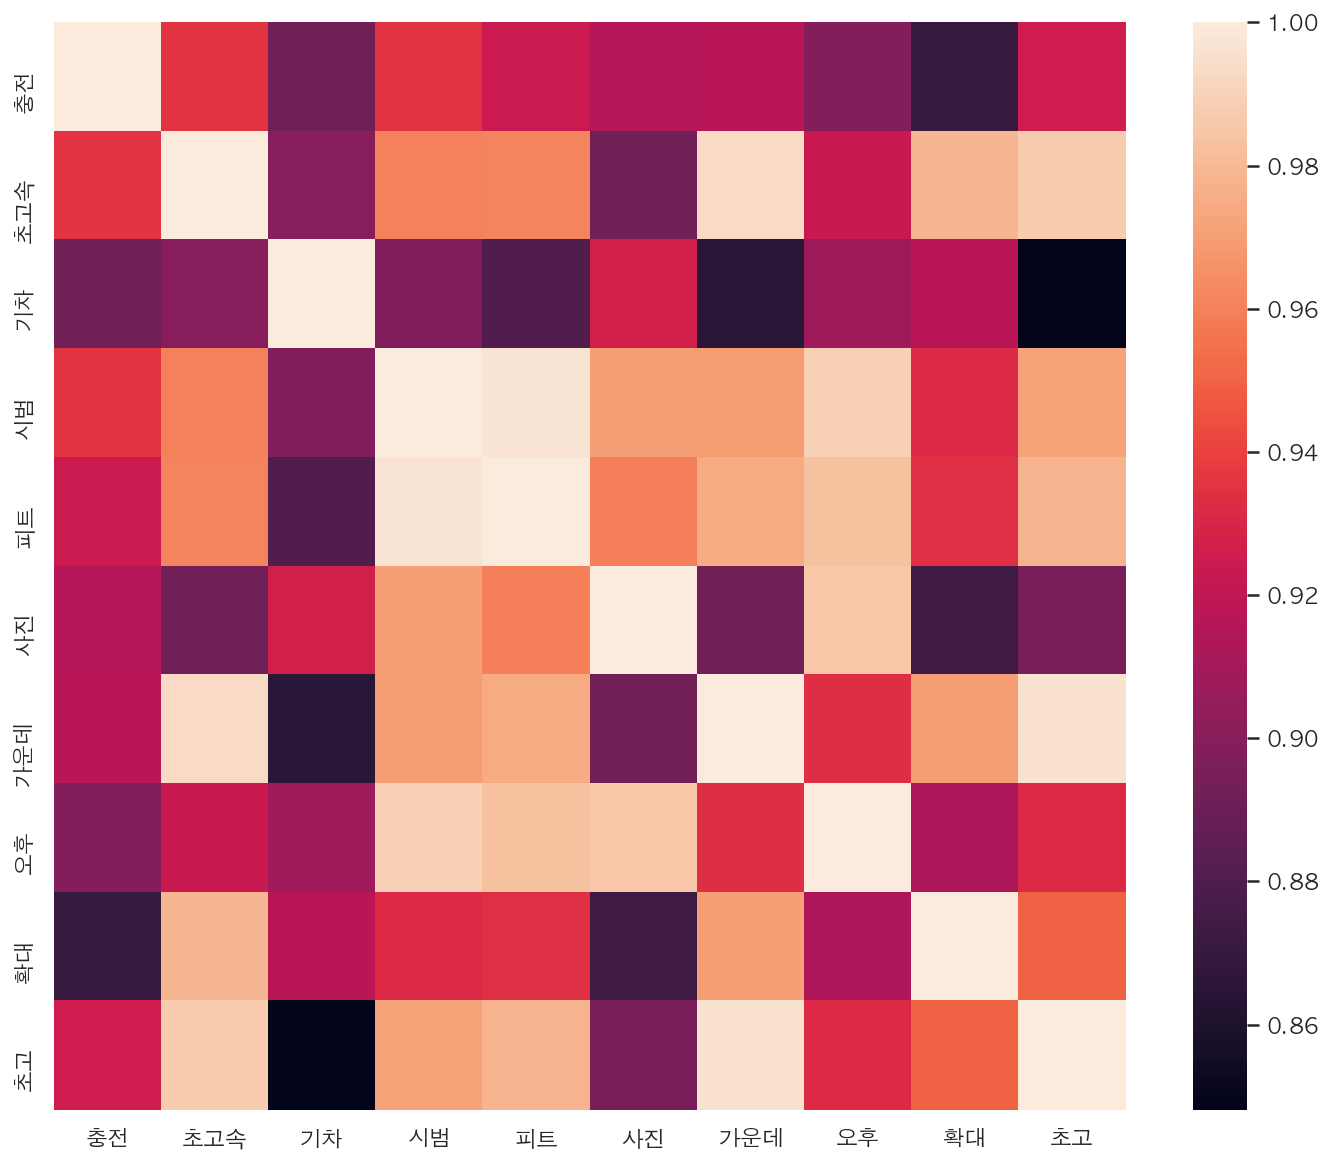

In [16]:
word_similarity  = [[model.wv.similarity(electric_sim[i], word) for word in electric_sim] for i in range(len(electric_sim))]
word_similarity = pd.DataFrame(word_similarity, index=electric_sim, columns=electric_sim)
plt.figure(figsize=(12, 10))
sns.heatmap(word_similarity)

전기차와 가장 유사한 단어 10개에 대해 공통적으로 등장하는 유사어와 유사도

In [17]:
df_list = []
for i in electric_sim:
    df = pd.DataFrame(model.wv.most_similar(i, topn=100), columns=['단어', i])
    df_list.append(df)

df = [df.set_index(['단어']) for df in df_list]
fine_df = pd.concat(df, join='inner', axis=1).reset_index()
fine_df.head(10)

,단어,충전,초고속,기차,시범,피트,사진,가운데,오후,확대,초고
0,전기차,0.974883,0.964035,0.960340,0.958157,0.948214,0.948087,0.943997,0.939595,0.939492,0.939299
1,경기,0.907091,0.871424,0.895194,0.965435,0.952652,0.992310,0.877078,0.981482,0.842533,0.885316
2,장거리,0.876363,0.925632,0.896507,0.985274,0.984926,0.973459,0.940172,0.995911,0.924183,0.936085
3,개최,0.868080,0.919445,0.876986,0.982044,0.983260,0.964791,0.936639,0.989196,0.911053,0.939476
4,참석,0.867016,0.856874,0.908279,0.953972,0.943389,0.991389,0.863146,0.983536,0.852435,0.863458
5,마련,0.858712,0.866637,0.919402,0.953642,0.944728,0.988022,0.871496,0.985467,0.874309,0.866172
6,본격적,0.849453,0.881524,0.921873,0.944845,0.939018,0.963993,0.885242,0.974225,0.904860,0.868566
7,제공,0.849434,0.850507,0.919384,0.941431,0.931079,0.987143,0.851532,0.976213,0.856343,0.849067
8,이날,0.847429,0.873956,0.902197,0.960738,0.955074,0.982021,0.884997,0.989263,0.880111,0.881910
9,모습,0.846766,0.892594,0.916500,0.962014,0.958927,0.976438,0.900897,0.987891,0.907667,0.893967


가장 유사한 단어를 찾는데 긍정적인 단어는 유사성에 긍정적으로 기여하고 부정적인 단어는 부정적으로 기여함.  
https://tedboy.github.io/nlps/generated/generated/gensim.models.Word2Vec.most_similar.html

In [18]:
# 전기차, 보조금에 긍정적인 유사도를 갖고, 충전소에 부정적인 유사성을 가지는 단어들
model.wv.most_similar(positive=['전기차', '보조금'], negative=['충전소'])

[('중국', 0.9837449789047241),
 ('모델', 0.9829844832420349),
 ('올해', 0.9752392768859863),
 ('기업', 0.9735089540481567),
 ('기술', 0.9722594022750854),
 ('세계', 0.9712377786636353),
 ('출시', 0.9694052934646606),
 ('배터리', 0.9680675268173218),
 ('계획', 0.9679892063140869),
 ('테크놀로지', 0.9642206430435181)]

모델 저장

In [19]:
model.save('data/Word2vec.model')

## Word2Vec 시각화

<ipython-input-20-0edb52b488a1>:40: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = model[vocab]


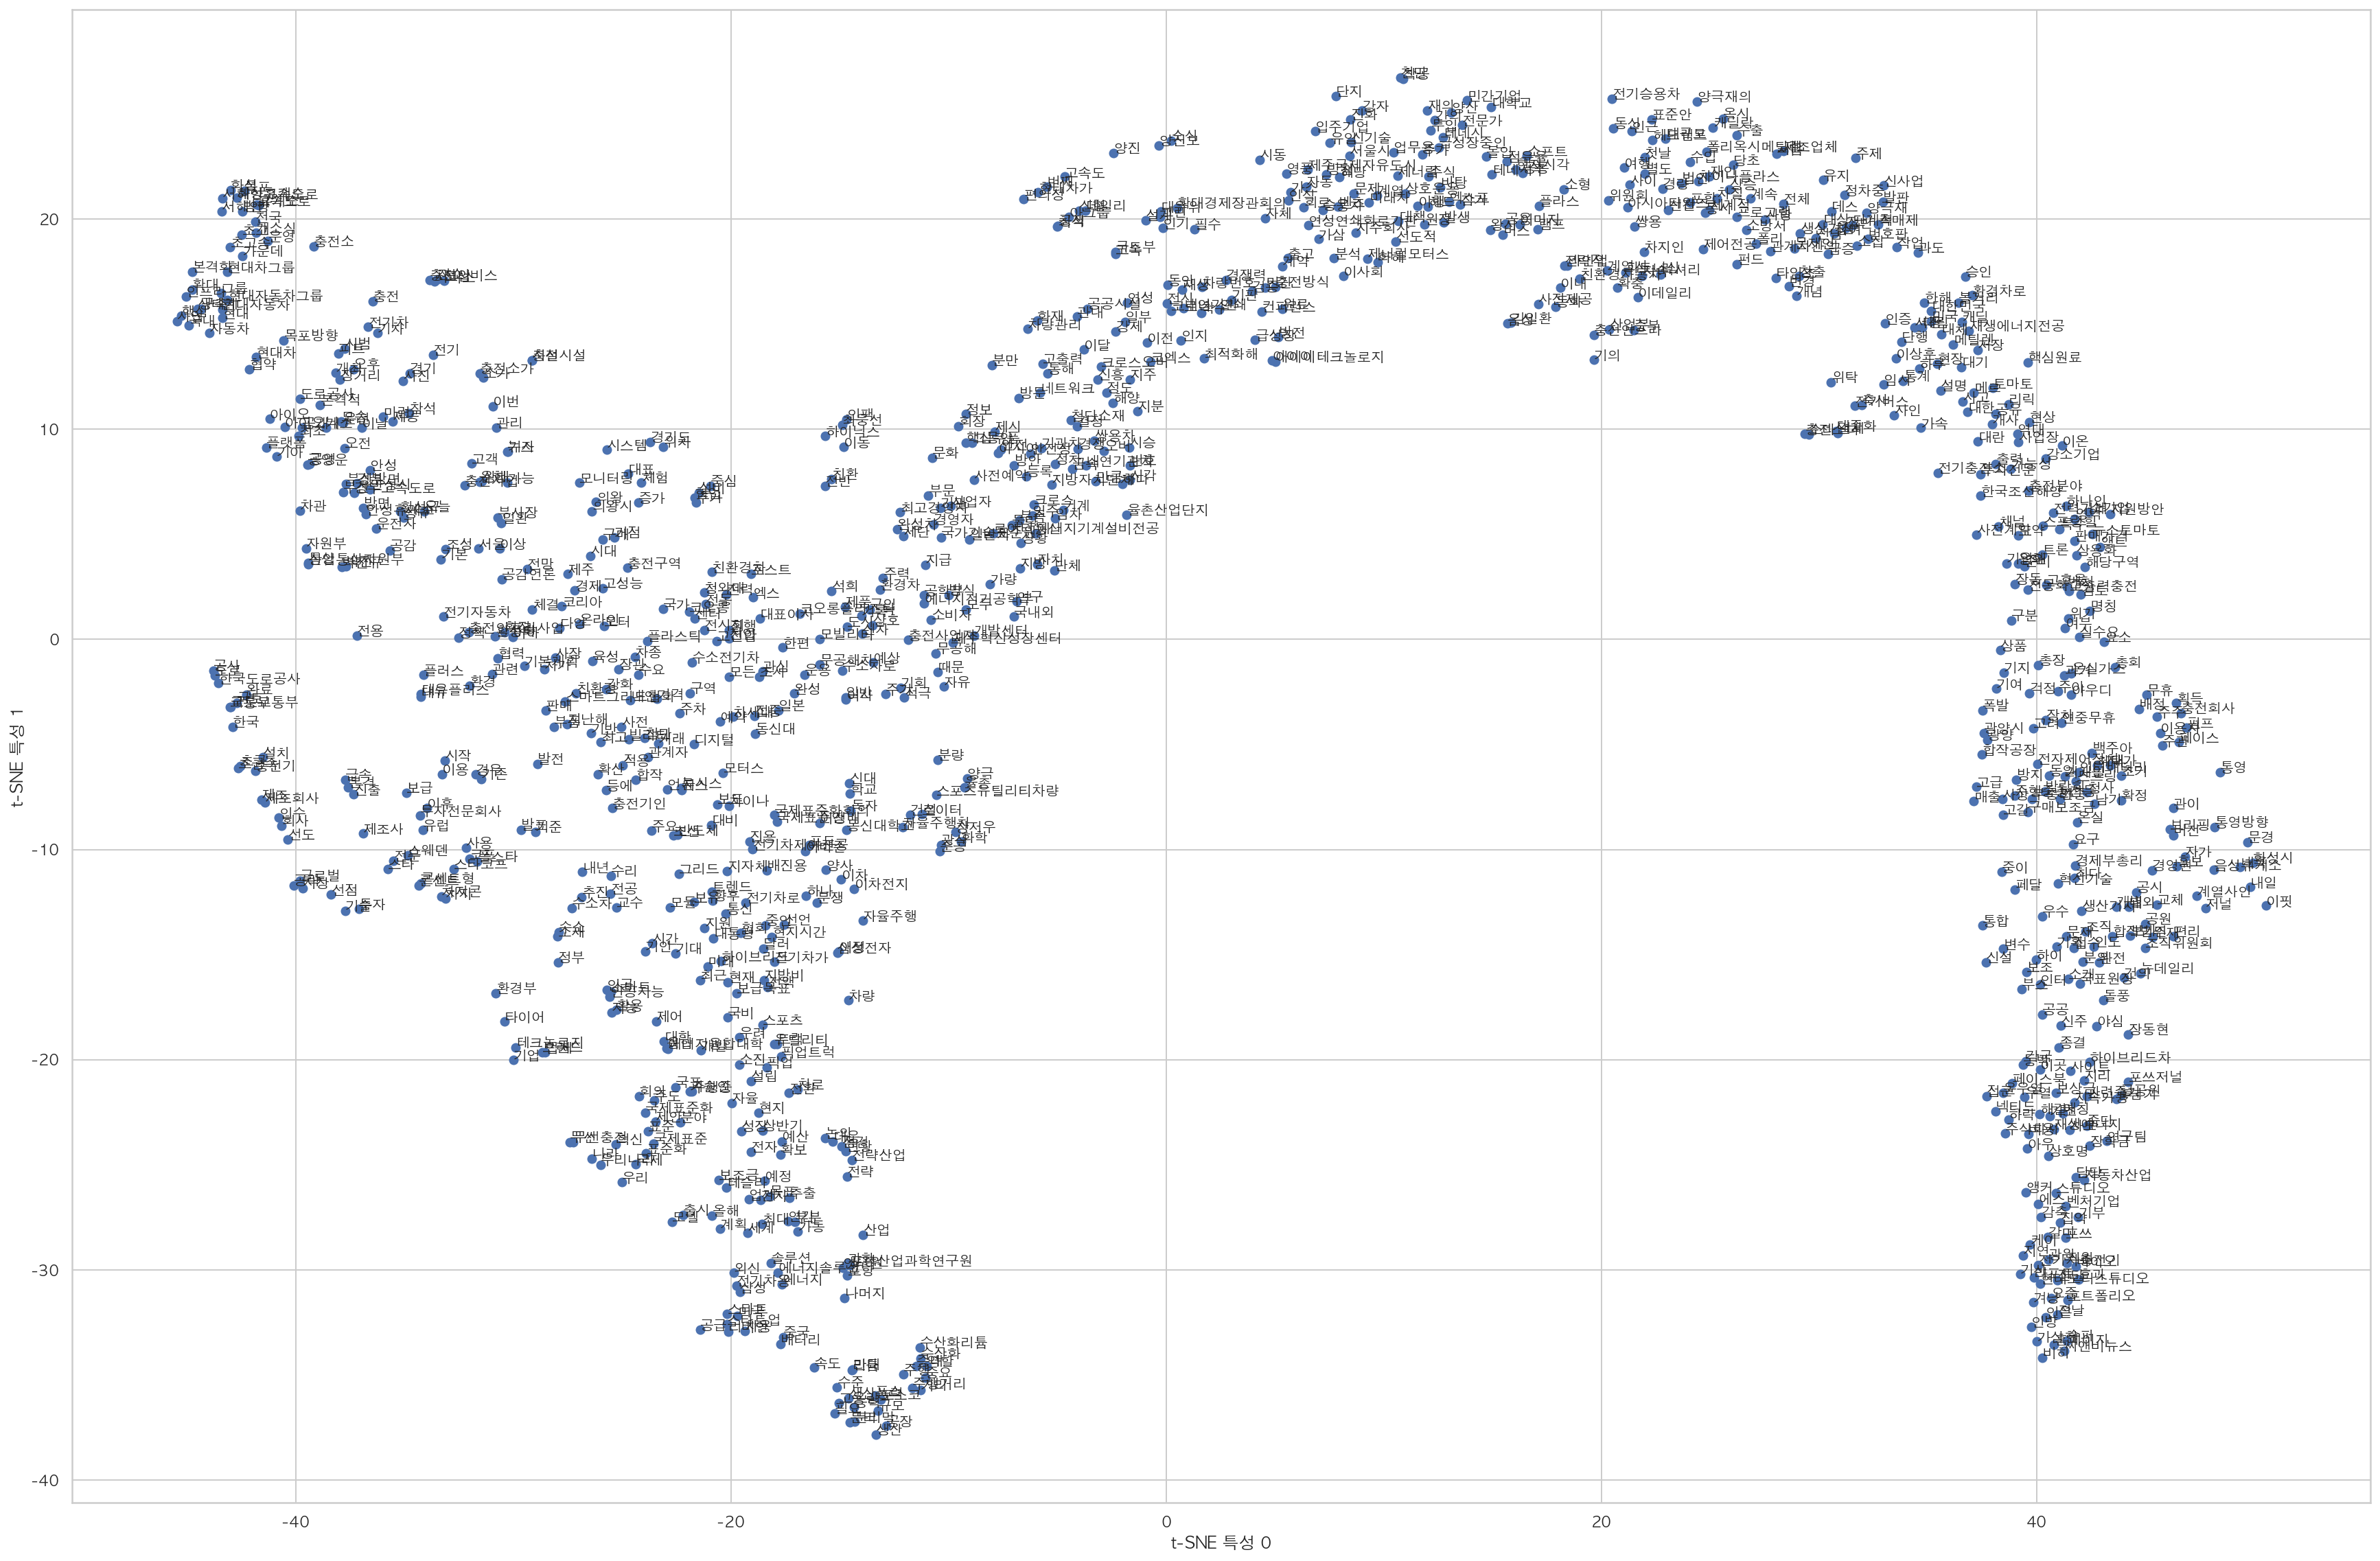

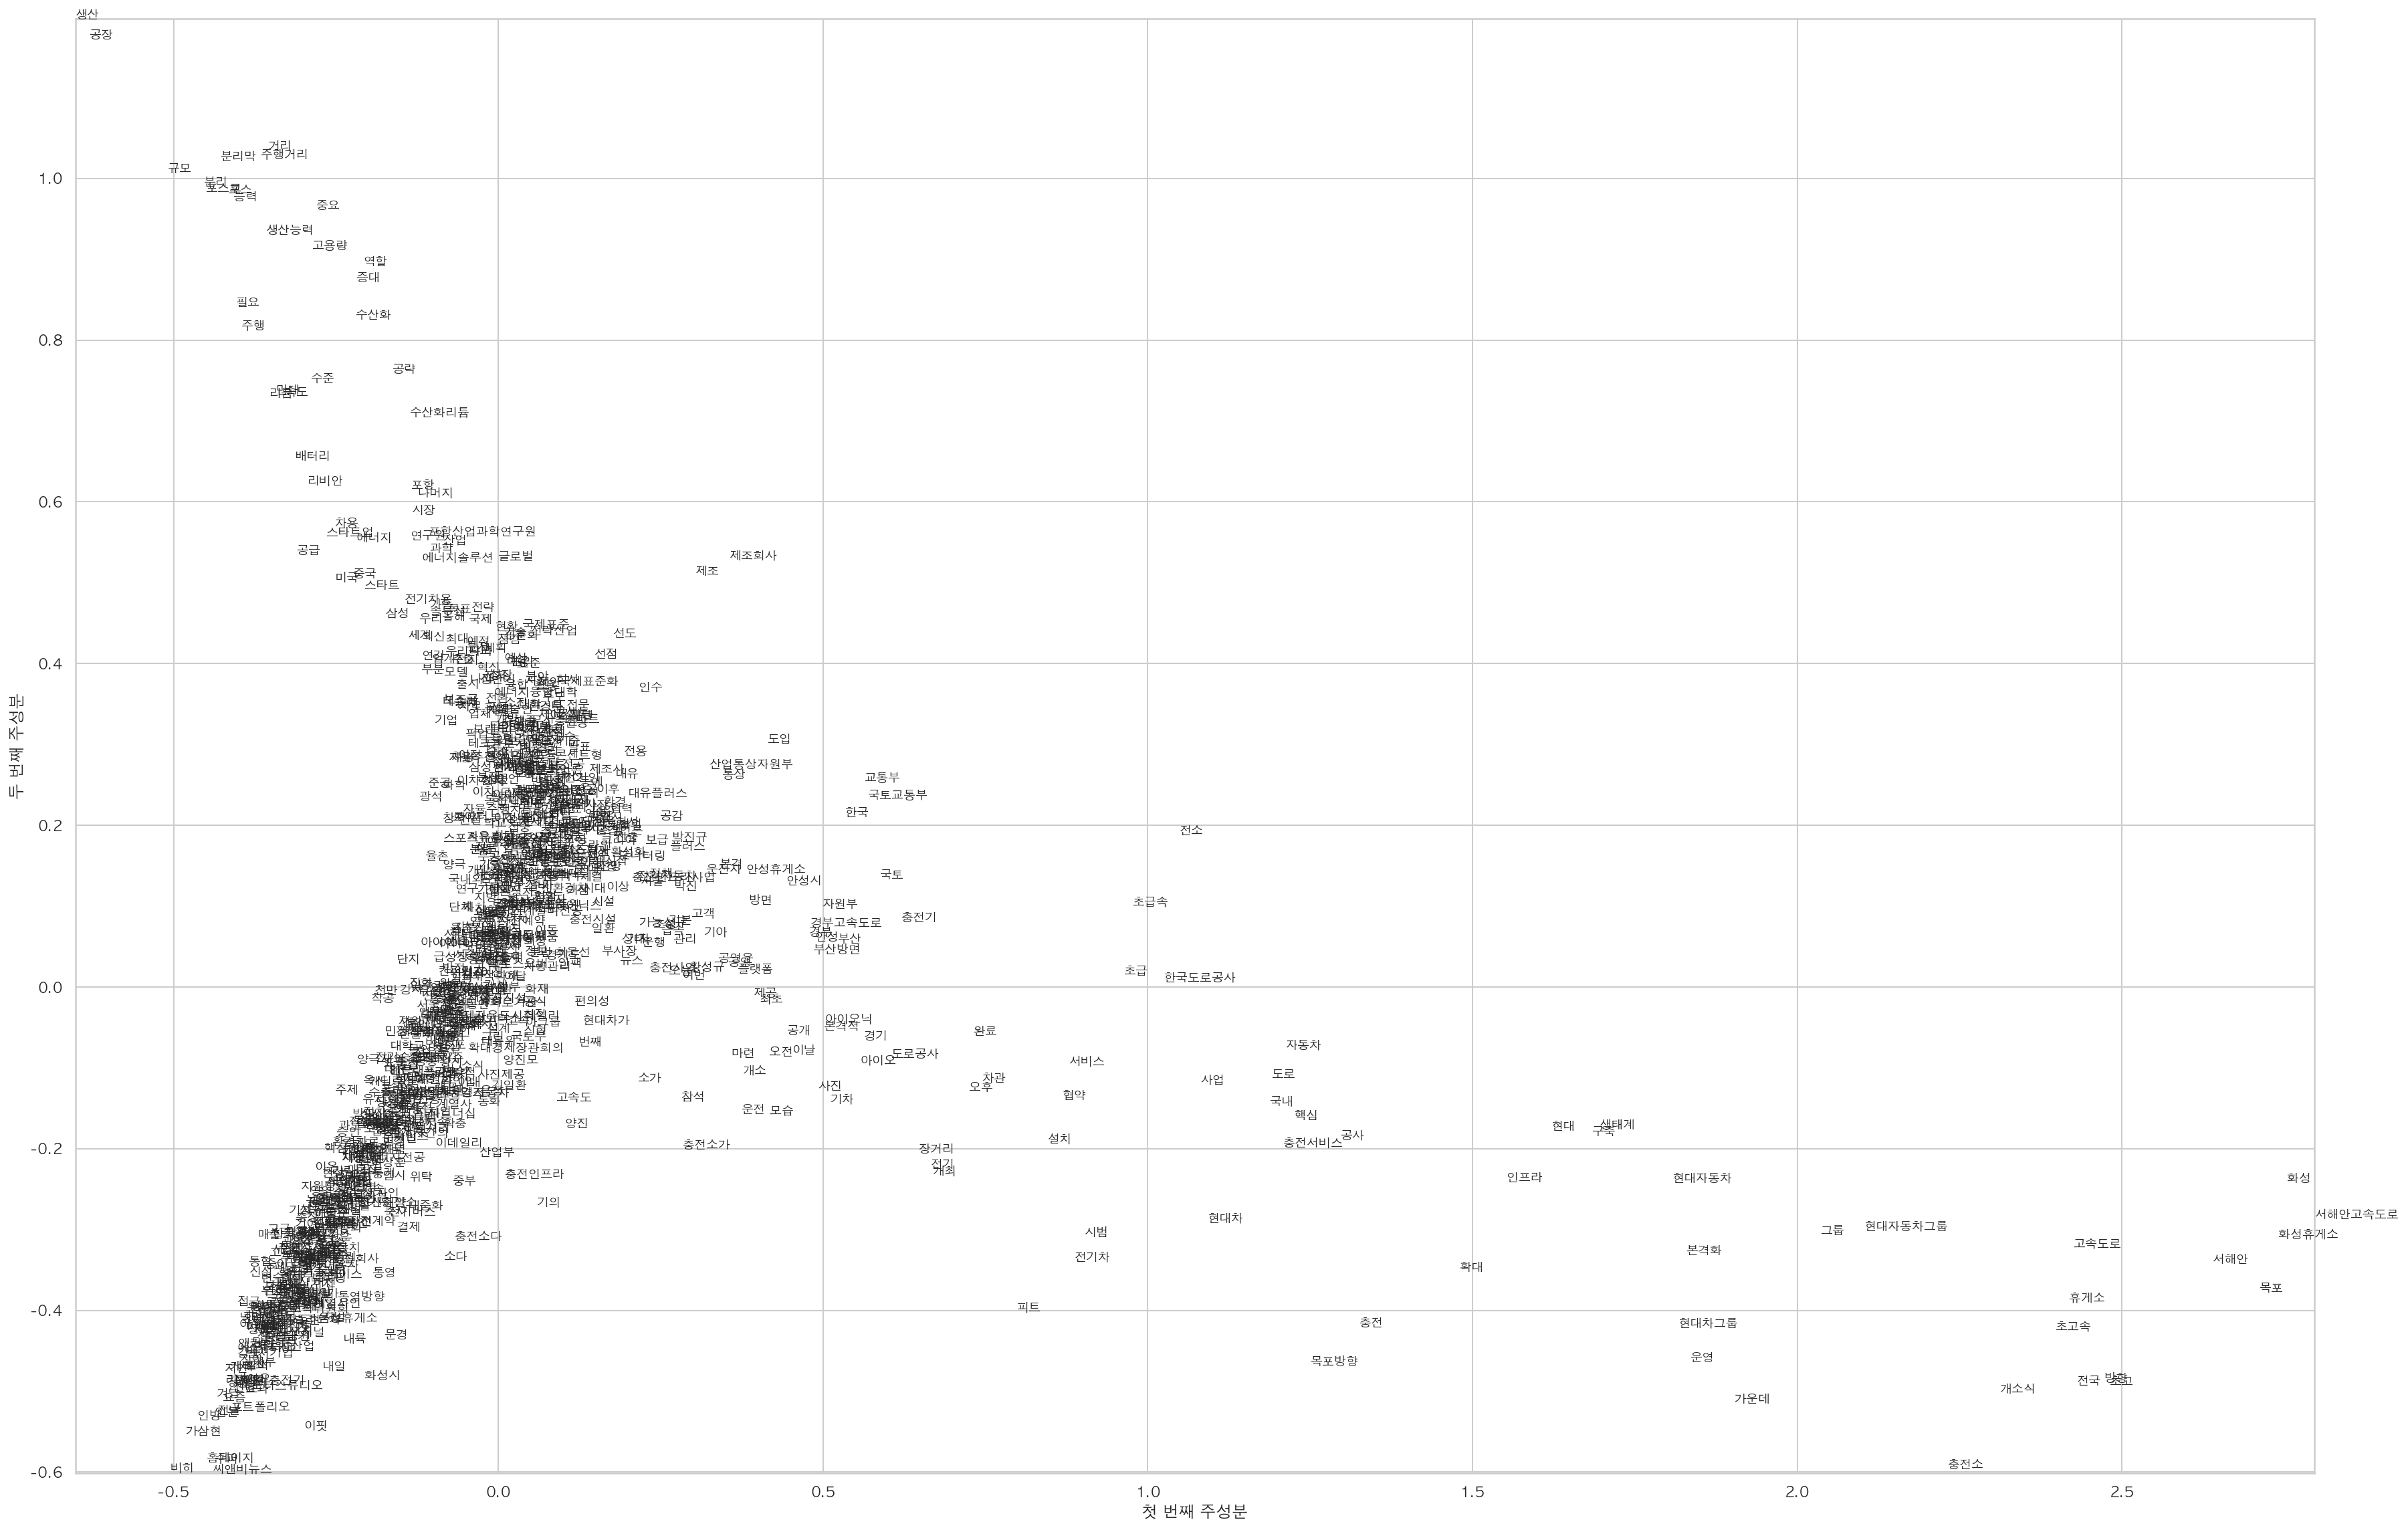

In [20]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from gensim.models import KeyedVectors

def show_tsne():
    tsne = TSNE(n_components=2)
    X = tsne.fit_transform(X_show)
    
    df = pd.DataFrame(X, index=vocab_show, columns=['x', 'y'])
    fig = plt.figure()
    
    fig.set_size_inches(30, 20)
    ax = fig.add_subplot(1, 1, 1) 
    ax.scatter(df['x'], df['y']) 
    
    for word, pos in df.iterrows(): 
        ax.annotate(word, pos, fontsize=10) 
    plt.xlabel("t-SNE 특성 0") 
    plt.ylabel("t-SNE 특성 1") 
    plt.show() 
        
def show_pca(): # PCA 모델을 생성합니다 
    pca = PCA(n_components=2) 
    pca.fit(X_show) # 처음 두 개의 주성분으로 숫자 데이터를 변환합니다 
    x_pca = pca.transform(X_show) 
    plt.figure(figsize=(30, 20)) 
    plt.xlim(x_pca[:, 0].min(), x_pca[:, 0].max())
    plt.ylim(x_pca[:, 1].min(), x_pca[:, 1].max()) 
    for i in range(len(X_show)): 
        plt.text(x_pca[i, 0], x_pca[i, 1], str(vocab_show[i]), fontdict={'weight': 'bold', 'size': 9}) 
    
    plt.xlabel("첫 번째 주성분")
    plt.ylabel("두 번째 주성분") 
        
    plt.show() 
        
# model_name = 'data/Word2vec.model' 
# model = KeyedVectors.load_word2vec_format(model) 
vocab = list(model.wv.vocab) 
X = model[vocab]

# sz개의 단어에 대해서만 시각화 
sz = 999
X_show = X[:sz,:] 
vocab_show = vocab[:sz] 
show_tsne() 
show_pca()

참고자료 

[t-SNE](https://ratsgo.github.io/machine%20learning/2017/04/28/tSNE/)    
[Word2Vec을 이용한 '깃대종' 단어간 유사도 측정](https://blog.daum.net/geoscience/1414)  

[Word2Vec 시각화 코드 출처 : Word2Vec 시각화(t-SNE, PCA)](https://joyhong.tistory.com/133)